# Analyse Exploratoire du fichier myreport_ping_full.csv

### Imports (fichier & modules)

In [1]:
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np
#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [2]:
tab = pda.read_csv('../data/logServer/myreport_ping_full.csv',sep=',')

### Le fichier myreport_ping_full.csv : taille, colonnes

In [3]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  14  colonnes dans le data frame


In [4]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Temps du ping',
       'Temps du ping(RAW)', 'Minimum', 'Minimum(RAW)', 'Maximum',
       'Maximum(RAW)', 'Perte de paquets', 'Perte de paquets(RAW)',
       'Temps mort', 'Temps mort(RAW)', 'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [5]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date et heure          2882 non-null   object 
 1   Date et heure(RAW)     2881 non-null   float64
 2   Temps du ping          2195 non-null   object 
 3   Temps du ping(RAW)     2194 non-null   float64
 4   Minimum                2195 non-null   object 
 5   Minimum(RAW)           2194 non-null   float64
 6   Maximum                2195 non-null   object 
 7   Maximum(RAW)           2194 non-null   float64
 8   Perte de paquets       2186 non-null   object 
 9   Perte de paquets(RAW)  2194 non-null   float64
 10  Temps mort             2195 non-null   object 
 11  Temps mort(RAW)        2194 non-null   float64
 12  Couverture             2882 non-null   object 
 13  Couverture(RAW)        2881 non-null   float64
dtypes: float64(7), object(7)
memory usage: 315.3+ KB


On peut déjà voir que :
- faudra supprimer les colonnes 8 et 9 car elles sont vides
- colonnes 21, 23, 25, 26 contiennent certains élements vides

In [6]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure            2882
Date et heure(RAW)       2881
Temps du ping              10
Temps du ping(RAW)        418
Minimum                     3
Minimum(RAW)                5
Maximum                    36
Maximum(RAW)              400
Perte de paquets            2
Perte de paquets(RAW)       3
Temps mort                  1
Temps mort(RAW)             1
Couverture                  3
Couverture(RAW)             2
dtype: int64


En plus des colonnes 8 et 9, on pourra supprimer les colonnes 15, 16, 17. 

In [7]:
tab.head()


,Date et heure,Date et heure(RAW),Temps du ping,Temps du ping(RAW),Minimum,Minimum(RAW),Maximum,Maximum(RAW),Perte de paquets,Perte de paquets(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,1 ms,0.7333,0 ms,0.0,3 ms,2.7667,0 %,0.0,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,0 ms,0.0033,0 ms,0.0,0 ms,0.0167,0 %,0.0,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,0 ms,0.0000,0 ms,0.0,0 ms,0.0000,0 %,0.0,0 %,0.0,100 %,10000.0


## Analyse temporelle

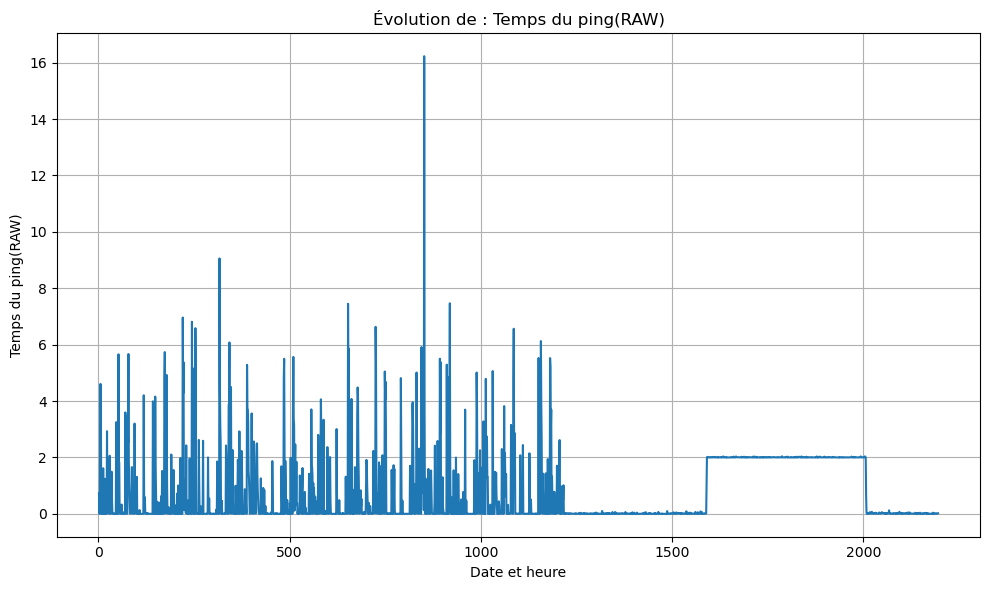

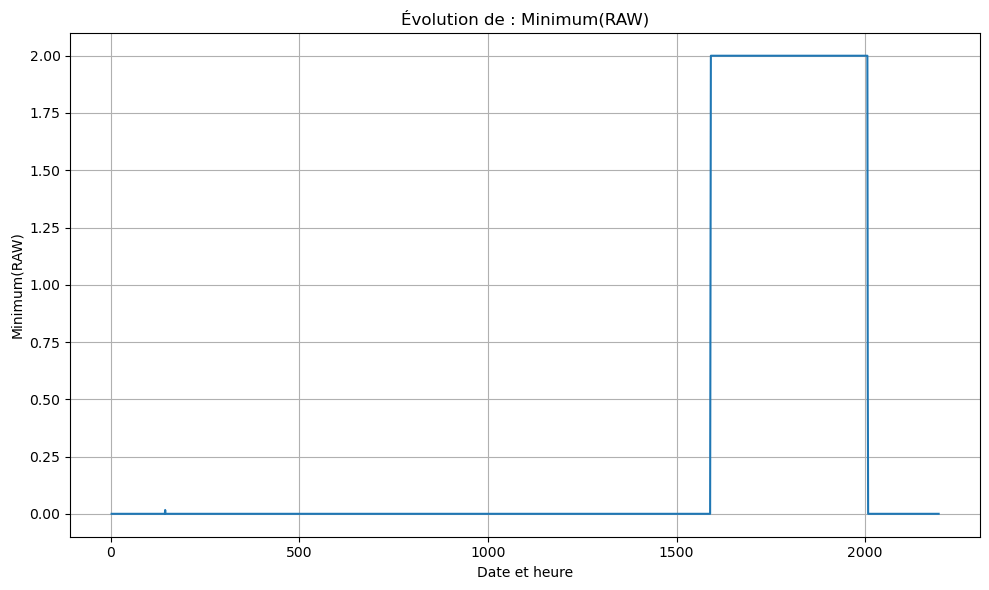

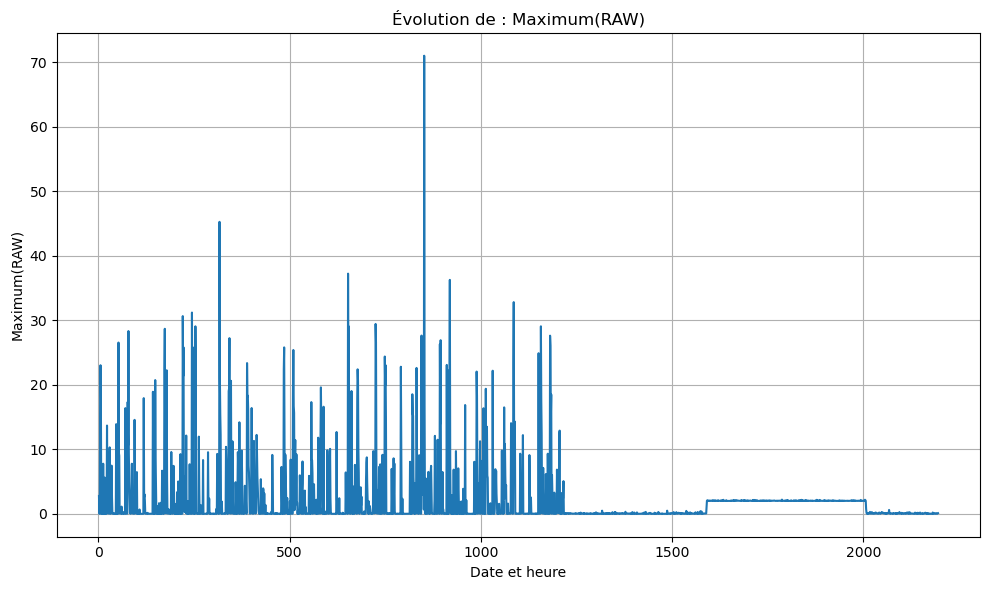

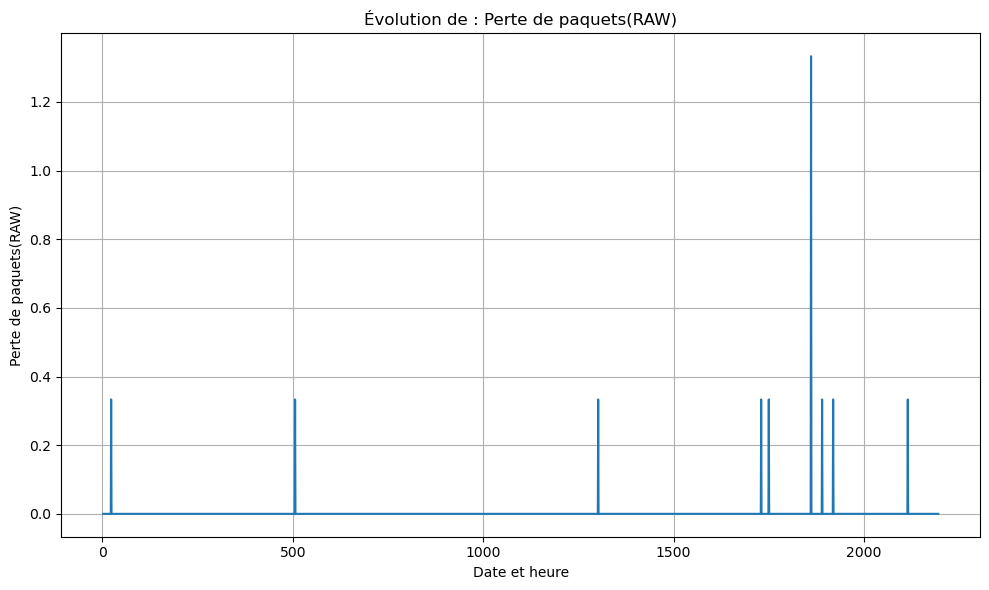

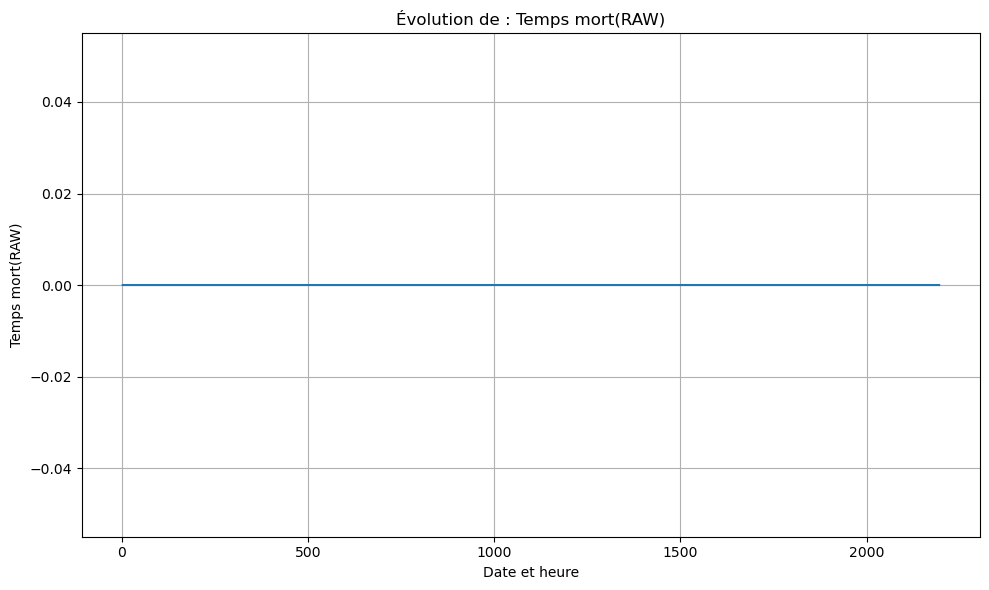

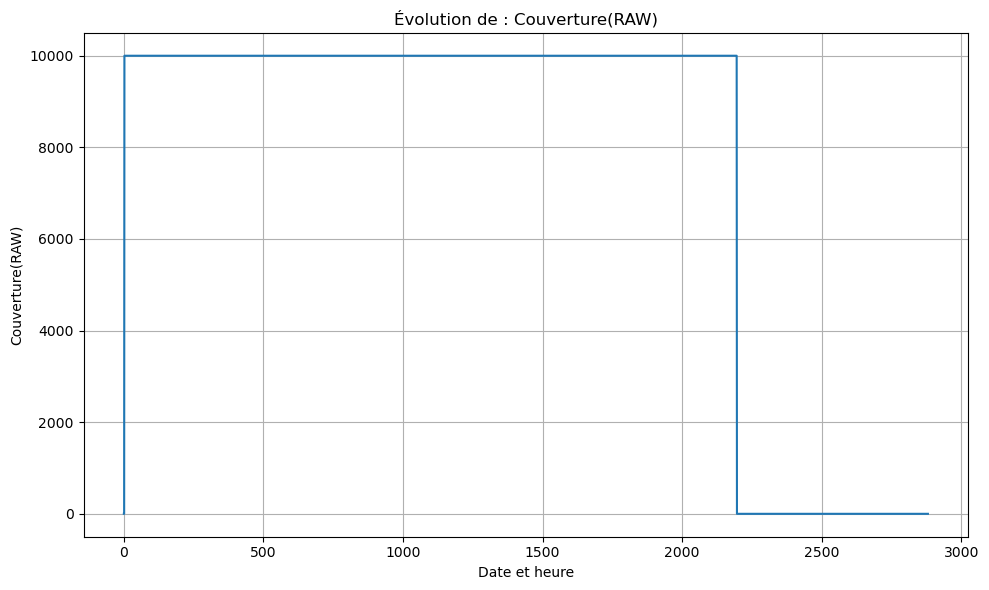

In [8]:
df=tab.copy()

# Boucle pour générer les graphiques
for col in df.columns:
    if col != 'Date et heure(RAW)' and "RAW" in col:  # Exclure la colonne 'Date et heure(RAW)'
        plt.figure(figsize=(10, 6))
        df[col].plot(kind='line', title=f'Évolution de : {col}')
        plt.xlabel('Date et heure')
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()